In [2]:
%pwd

'/home/italo/dev/ML/Incubator/incubator/notebooks'

In [44]:
import pandas as pd
import numpy as np
from pathlib import Path

In [45]:
DATA_PATH = Path('../data')
DEV_PATH = DATA_PATH / 'dev'

dev = pd.read_csv(DEV_PATH / 'metadata.csv')

In [46]:
dev.Sentiment.value_counts(normalize=True)

neutral     0.423805
negative    0.366096
positive    0.210099
Name: Sentiment, dtype: float64

In [47]:
dev.Emotion.value_counts(normalize=True)

neutral     0.423805
joy         0.146979
anger       0.137962
surprise    0.135257
sadness     0.100090
fear        0.036069
disgust     0.019838
Name: Emotion, dtype: float64

In [48]:
dev.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"


In [49]:
# Replace the Unicode characters with their appropriate replacements
#dev['Utterance'] = dev.Utterance.apply(lambda s: s.replace('\x92', "'"))
#dev['Utterance'] = dev.Utterance.apply(lambda s: s.replace('\x85', ". "))
#dev['Utterance'] = dev.Utterance.apply(lambda s: s.replace('\x97', " "))
#dev['Utterance'] = dev.Utterance.apply(lambda s: s.replace('\x91', ""))
#dev['Utterance'] = dev.Utterance.apply(lambda s: s.replace('\x93', ""))
#dev['Utterance'] = dev.Utterance.apply(lambda s: s.replace('\xa0', ""))
#dev['Utterance'] = dev.Utterance.apply(lambda s: s.replace('\x94', ""))

dev['Utterance'] = (
    dev.Utterance.apply(lambda s: s.replace('\x92', "'"))
        .apply(lambda s: s.replace('\x85', ". "))
        .apply(lambda s: s.replace('\x97', " "))
        .apply(lambda s: s.replace('\x91', ""))
        .apply(lambda s: s.replace('\x93', ""))
        .apply(lambda s: s.replace('\xa0', ""))
        .apply(lambda s: s.replace('\x94', ""))
)


In [53]:
ss

0

In [52]:
text_sizes = dev.Utterance.str.split(' ').apply(lambda s: len(s))
text_sizes

0       10
1        1
2       18
3        3
4        8
        ..
1104     1
1105    10
1106     4
1107     8
1108     2
Name: Utterance, Length: 1109, dtype: int64

In [33]:
text_sizes.describe()

count    1109.000000
mean        8.028855
std         6.098698
min         1.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        37.000000
Name: Utterance, dtype: float64

In [34]:
text_sizes.value_counts()

1     137
3      88
2      86
4      84
6      80
5      75
7      60
11     60
8      59
10     51
9      49
12     48
14     43
13     33
17     23
16     21
18     17
19     17
15     16
20     15
23     11
21     10
22     10
24      5
28      3
25      2
36      1
26      1
31      1
33      1
34      1
37      1
Name: Utterance, dtype: int64

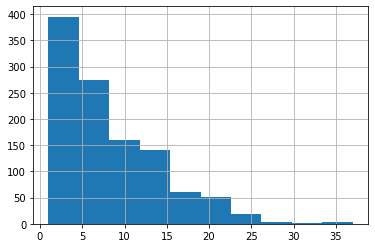

In [35]:
text_sizes.hist()

In [ ]:
138/len(text_sizes)

In [36]:
from spacy.lang.en import English
nlp = English()
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
tokeniser = nlp.Defaults.create_tokenizer(nlp)

In [37]:
dev['Tokenised_Utterance'] = dev.Utterance.apply(lambda s: tokeniser(s))
dev['Utterance_NTokens'] = dev.Tokenised_Utterance.apply(len)

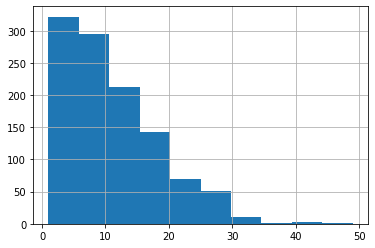

In [38]:
dev.Utterance_NTokens.hist()

In [39]:
dev.loc[dev.Utterance_NTokens == 2, ['Utterance', 'Tokenised_Utterance']]

,Utterance,Tokenised_Utterance
1,What?,"(What, ?)"
6,Hey.,"(Hey, .)"
7,Hey!,"(Hey, !)"
22,Yeah!,"(Yeah, !)"
43,What?,"(What, ?)"
...,...,...
1078,Yeah.,"(Yeah, .)"
1088,Huh?,"(Huh, ?)"
1096,But I,"(But, I)"
1100,And it,"(And, it)"


In [40]:
dev.Utterance_NTokens.describe()

count    1109.000000
mean       10.929666
std         7.481536
min         1.000000
25%         5.000000
50%         9.000000
75%        16.000000
max        49.000000
Name: Utterance_NTokens, dtype: float64

In [41]:
dev.Utterance_NTokens.value_counts(normalize=True)

2     0.099188
5     0.071235
6     0.062218
4     0.057710
9     0.055906
3     0.055005
7     0.055005
8     0.050496
13    0.045987
11    0.043282
10    0.042381
15    0.039675
16    0.033363
14    0.031560
12    0.031560
17    0.030658
18    0.025248
19    0.021641
23    0.018936
20    0.018034
21    0.017133
22    0.017133
25    0.015329
27    0.011722
26    0.009919
24    0.009017
1     0.007214
29    0.005410
28    0.003607
33    0.003607
30    0.002705
31    0.002705
44    0.000902
36    0.000902
38    0.000902
40    0.000902
41    0.000902
49    0.000902
Name: Utterance_NTokens, dtype: float64

In [42]:
dev.Utterance_NTokens.value_counts()

2     110
5      79
6      69
4      64
9      62
3      61
7      61
8      56
13     51
11     48
10     47
15     44
16     37
14     35
12     35
17     34
18     28
19     24
23     21
20     20
21     19
22     19
25     17
27     13
26     11
24     10
1       8
29      6
28      4
33      4
30      3
31      3
44      1
36      1
38      1
40      1
41      1
49      1
Name: Utterance_NTokens, dtype: int64